In [1]:
import sys

In [2]:
print(sys.executable)

/cvmfs/jupyter.hpc.rwth.de/clients/python311-c23/bin/python


In [3]:
sys.path.append('/home/bh774267/.local/lib/python3.11/site-packages')

In [4]:
import pennylane as qml

In [19]:
%pip install --user kaggle

  Using cached kaggle-1.7.4.5-py3-none-any.whl.metadata (16 kB)
  Using cached protobuf-6.32.1-cp39-abi3-manylinux2014_x86_64.whl.metadata (593 bytes)
  Using cached python_slugify-8.0.4-py2.py3-none-any.whl.metadata (8.5 kB)
  Using cached text_unidecode-1.3-py2.py3-none-any.whl.metadata (2.4 kB)
Using cached kaggle-1.7.4.5-py3-none-any.whl (181 kB)
Using cached protobuf-6.32.1-cp39-abi3-manylinux2014_x86_64.whl (322 kB)
Using cached python_slugify-8.0.4-py2.py3-none-any.whl (10 kB)
Using cached text_unidecode-1.3-py2.py3-none-any.whl (78 kB)
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [8]:
%pip install --user matplotlib

Note: you may need to restart the kernel to use updated packages.


In [9]:
%pip install --user torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 888.1/888.1 MB 139.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 173.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 104.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 163.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 96.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 706.8/706.8 MB 164.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 MB 147.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 134.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 MB 157.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.5/267.5 MB 169.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 MB 178.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [5]:
import torch

In [6]:
import matplotlib.pyplot as plt

In [7]:
import numpy as np

In [21]:
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset
from sklearn.metrics import f1_score, precision_score, recall_score

In [14]:
%pip install --user torchvision

  Using cached torch-2.8.0-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (30 kB)
  Using cached filelock-3.19.1-py3-none-any.whl.metadata (2.1 kB)
  Using cached fsspec-2025.7.0-py3-none-any.whl.metadata (12 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.8.93-py3-none-manylinux2010_x86_64.manylinux_2_12_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_cuda_runtime_cu12-12.8.90-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_cuda_cupti_cu12-12.8.90-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_cudnn_cu12-9.10.2.21-py3-none-manylinux_2_27_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_cublas_cu12-12.8.4.1-py3-none-manylinux_2_27_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_cufft_cu12-11.3.3.83-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_curand_cu12-10.3.9.90-py3-none-manylinux_2_27_x86_64.whl.metadata (1.7 kB)
  Using cached nvid

In [22]:
#Key Parameters Definition
batch_size_train = 64
batch_size_test = 64
learning_rate = 0.01

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [23]:
#Data Preparation
import os
import torchvision
from torchvision import datasets, transforms

In [45]:
transform_mnist=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.5,), (0.5,))
                             ])

trainset_mnist = torchvision.datasets.MNIST(root='./data-mnist', train=True, download=True, transform=transform_mnist)
#train_subset = Subset(trainset_mnist, list(range(10000)))

trainloader_mnist = torch.utils.data.DataLoader(trainset_mnist, batch_size=batch_size_train, shuffle=True)

testset_mnist = torchvision.datasets.MNIST(root='./data-mnist', train=False, download=True, transform=transform_mnist)
#test_subset = Subset(testset_mnist, list(range(200)))
testloader_mnist = torch.utils.data.DataLoader(testset_mnist, batch_size=batch_size_test, shuffle=False)

classes_mnist = ('0','1','2','3','4','5','6','7','8','9')

In [24]:
transform_mnist=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.5,), (0.5,))
                             ])

cnn_trainset_mnist = torchvision.datasets.MNIST(root='./data-mnist', train=True, download=True, transform=transform_mnist)
#train_subset = Subset(trainset_mnist, list(range(10000)))

cnn_trainloader_mnist = torch.utils.data.DataLoader(cnn_trainset_mnist, batch_size=batch_size_train, shuffle=True)

cnn_testset_mnist = torchvision.datasets.MNIST(root='./data-mnist', train=False, download=True, transform=transform_mnist)
#test_subset = Subset(testset_mnist, list(range(200)))
cnn_testloader_mnist = torch.utils.data.DataLoader(cnn_testset_mnist, batch_size=batch_size_test, shuffle=False)

classes_mnist = ('0','1','2','3','4','5','6','7','8','9')

In [25]:
#CNN Model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv_layer = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),  # [1,28,28] -> [32,28,28]
            nn.ReLU(),
            nn.MaxPool2d(2),                             # -> [32,14,14]
            nn.Conv2d(32, 64, kernel_size=3, padding=1), # -> [64,14,14]
            nn.ReLU(),
            nn.MaxPool2d(2)                              # -> [64,7,7]
        )
        self.fc_layer = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * 7 * 7, 128),
            nn.ReLU(),
            nn.Linear(128, 10)  # 10 classes
        )

    def forward(self, x):
        x = self.conv_layer(x)
        x = self.fc_layer(x)
        return x

In [27]:
import time

#CNN Training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

model = CNN().to(device)
#Loss Function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


train_loss_history = []
train_acc_history = []
test_loss_history = []
test_acc_history = []
test_f1_history = [] 
epoch_time =[]

loss_bench = 0
n_epochs = 50

if device.type == 'cuda':
    # Reset memory stats and check before training starts
    torch.cuda.reset_peak_memory_stats(device)
    initial_memory = torch.cuda.max_memory_allocated(device)
    print(f"GPU Memory Initial State: {initial_memory / 1024**2:.2f} MB")

#Training of the Model
cnn_loss_values = [] # <-- store loss per epoch
cnn_accuracy = [] # store accuracy per epoch
epochs = 20
n_epochs = 30
#Evaluation on Test Dataset

def cnn_test(model, criterion, device):
    model.eval()
    running_loss = 0.0
    correct = 0
    
    all_labels = []
    all_predictions = []
    
    with torch.no_grad():
        for features, labels in cnn_testloader_mnist:
            features, labels = features.to(device), labels.to(device)
            outputs = model(features)
            
            # Calculate and accumulate loss
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            
            _, predicted = torch.max(outputs.data, 1)
            correct += (predicted == labels).sum().item()

            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())
            
        avg_loss = running_loss / len(cnn_testloader_mnist)
        accuracy = correct / len(cnn_testloader_mnist.dataset)
        
    # Calculate macro-averaged metrics
    # Note: Scikit-learn requires non-empty lists, which is guaranteed here
    macro_precision = precision_score(all_labels, all_predictions, average='macro', zero_division=0)
    macro_recall = recall_score(all_labels, all_predictions, average='macro', zero_division=0)
    macro_f1 = f1_score(all_labels, all_predictions, average='macro', zero_division=0)
    
    return avg_loss, accuracy, macro_precision, macro_recall, macro_f1

for epoch in range(n_epochs):
    model.train()
    running_loss = 0.0
    total = 0
    correct = 0
    start_time = time.time()
    
    for features, labels in cnn_trainloader_mnist:
        features, labels = features.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(features)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    end_time = time.time()
    
    # Calculate Training Metrics
    train_avg_loss = running_loss / len(cnn_trainloader_mnist)
    train_accuracy = correct / len(cnn_trainloader_mnist.dataset)
    
    # Store Training History
    train_loss_history.append(train_avg_loss)
    train_acc_history.append(train_accuracy*100)
    
    # Evaluate on Test Set
    val_loss, val_accuracy, val_precision, val_recall, val_f1 = cnn_test(model, criterion, device)
    
    # Store Test History
    test_loss_history.append(val_loss)
    test_acc_history.append(val_accuracy*100)
    test_f1_history.append(val_f1) # Example of tracking
    
    
    epoch_duration = end_time - start_time
    epoch_time.append(epoch_duration)

    
    # Print Epoch Summary 
    print(f"Epoch {epoch+1:02d}: "
          f"Train Loss: {train_avg_loss:.4f}, Train Acc: {train_accuracy:.4f} | "
          f"Test Loss: {val_loss:.4f}, Test Acc: {val_accuracy:.4f} | "
          f"Precision: {val_precision:.4f}, Recall: {val_recall:.4f}, F1: {val_f1:.4f} | "
          f"Time: {epoch_duration:.2f}s")
    
    if epoch == 0 and device.type == 'cuda':
        peak_memory = torch.cuda.max_memory_allocated(device)
        print(f"GPU Peak Memory Used: {(peak_memory - initial_memory) / 1024**2:.2f} MB")

"""
for epoch in range(n_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in cnn_trainloader_mnist:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    avg_loss = running_loss / len(cnn_trainloader_mnist)
    train_loss_history.append(avg_loss)  # <-- save this epoch's average loss
    print(f"CNN Epoch [{epoch+1}/{n_epochs}], CNN Loss: {avg_loss:.4f}")
    cnn_test(model)
"""

GPU Memory Initial State: 73.29 MB
Epoch 01: Train Loss: 0.1763, Train Acc: 0.9472 | Test Loss: 0.0686, Test Acc: 0.9779 | Precision: 0.9778, Recall: 0.9778, F1: 0.9777 | Time: 9.26s
GPU Peak Memory Used: 21.54 MB
Epoch 02: Train Loss: 0.0764, Train Acc: 0.9775 | Test Loss: 0.0683, Test Acc: 0.9782 | Precision: 0.9784, Recall: 0.9776, F1: 0.9779 | Time: 9.37s
Epoch 03: Train Loss: 0.0711, Train Acc: 0.9784 | Test Loss: 0.0798, Test Acc: 0.9771 | Precision: 0.9776, Recall: 0.9768, F1: 0.9771 | Time: 9.31s
Epoch 04: Train Loss: 0.0682, Train Acc: 0.9800 | Test Loss: 0.1144, Test Acc: 0.9682 | Precision: 0.9694, Recall: 0.9678, F1: 0.9680 | Time: 9.48s
Epoch 05: Train Loss: 0.0648, Train Acc: 0.9814 | Test Loss: 0.0727, Test Acc: 0.9800 | Precision: 0.9798, Recall: 0.9798, F1: 0.9797 | Time: 9.37s
Epoch 06: Train Loss: 0.0567, Train Acc: 0.9834 | Test Loss: 0.0862, Test Acc: 0.9771 | Precision: 0.9775, Recall: 0.9769, F1: 0.9770 | Time: 9.29s
Epoch 07: Train Loss: 0.0580, Train Acc: 0.983

'\nfor epoch in range(n_epochs):\n    model.train()\n    running_loss = 0.0\n    for images, labels in cnn_trainloader_mnist:\n        images, labels = images.to(device), labels.to(device)\n\n        outputs = model(images)\n        loss = criterion(outputs, labels)\n\n        optimizer.zero_grad()\n        loss.backward()\n        optimizer.step()\n        running_loss += loss.item()\n\n    avg_loss = running_loss / len(cnn_trainloader_mnist)\n    train_loss_history.append(avg_loss)  # <-- save this epoch\'s average loss\n    print(f"CNN Epoch [{epoch+1}/{n_epochs}], CNN Loss: {avg_loss:.4f}")\n    cnn_test(model)\n'

In [33]:
epoch_time.append(epoch_duration)
avg_epoch_time = 0
total_epoch_time = 0
for t in range(len(epoch_time)):
    total_epoch_time += epoch_time[t]

avg_epoch_time = total_epoch_time/len(epoch_time)
print(avg_epoch_time)

9.359091790517171


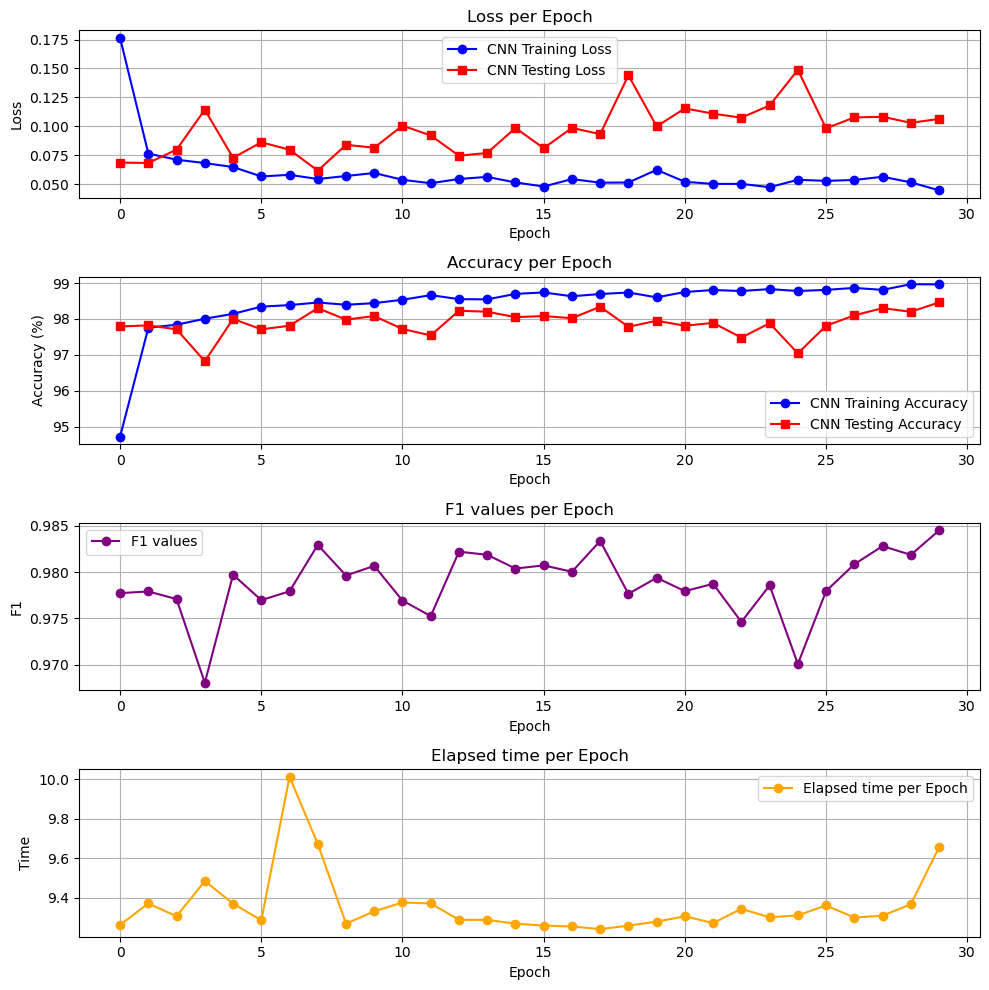

In [37]:

import matplotlib.pyplot as plt
# Plot training loss
plt.figure(figsize=(10, 10))

plt.subplot(4, 1,1)
plt.plot(train_loss_history, marker='o', label='CNN Training Loss', color='blue')
plt.plot(test_loss_history,marker='s', label='CNN Testing Loss', color='red')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

# Plot test accuracy
plt.subplot(4, 1, 2)
plt.plot(train_acc_history, marker= 'o', label='CNN Training Accuracy', color= 'blue')
plt.plot(test_acc_history,marker= 's', label= 'CNN Testing Accuracy', color= 'red')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(test_f1_history, marker= 'o', label='F1 values', color= 'purple')
#plt.plot(test_acc_history,marker= 's', label= 'QCNN Testing Accuracy', color= 'red')
plt.title('F1 values per Epoch')
plt.xlabel('Epoch')
plt.ylabel('F1')
plt.grid(True)
plt.legend()


plt.subplot(4, 1, 4)
plt.plot(epoch_time, marker= 'o', label='Elapsed time per Epoch', color= 'orange')
#plt.plot(test_acc_history,marker= 's', label= 'QCNN Testing Accuracy', color= 'red')
plt.title('Elapsed time per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Time')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.savefig('mnist_cnn_F1_epochTime.png')
plt.show()

In [46]:
import pennylane as qml
import os
from pennylane import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset
from torch.func import vmap

In [47]:
#Quantum Device settings
dev = qml.device("default.qubit", wires=8)

In [48]:
# QCNN layer
def qcnn_block(weights,wires):
    for w in range(wires):
        qml.Hadamard(w)
    
    # Convolution Layer 1
    qml.CNOT(wires=[0, 1])
    qml.RY(weights[0], wires=1)
    qml.CNOT(wires=[2, 3])
    qml.RY(weights[2], wires=3)
    qml.CNOT(wires=[4, 5])
    qml.RY(weights[4], wires=5)
    qml.CNOT(wires=[6, 7])
    qml.RY(weights[6], wires=7)
    #qml.CNOT(wires=[8, 9])
    #qml.RY(weights[7], wires=9)
    
    # Pooling Layer 1
    qml.CNOT(wires=[1, 0])
    qml.RY(weights[1], wires=0)  # keep 0, discard 1
    qml.CNOT(wires=[3, 2])
    qml.RY(weights[3], wires=2)  # keep 2, discard 3
    qml.CNOT(wires=[5, 4])
    qml.RY(weights[5], wires=4)  # keep 4, discard 5
    qml.CNOT(wires=[7, 6])
    qml.RY(weights[7], wires=6)  # keep 6, discard 7
    #qml.CNOT(wires=[9, 8])
    #qml.RY(weights[9], wires=8)  # keep 8, discard 9
    
    # Convolution Layer 2
    qml.CNOT(wires=[0, 2])
    qml.RY(weights[8], wires=2)
    qml.CNOT(wires=[2, 4])
    qml.RY(weights[10], wires=4)
    qml.CNOT(wires=[4, 6])
    qml.RY(weights[12], wires=6)
    #qml.CNOT(wires=[6, 8])
    #qml.RY(weights[9], wires=8)

    # Pooling Layer 2
    qml.CNOT(wires=[2, 0])
    qml.RY(weights[9], wires=0)  # keep 0, discard 1
    qml.CNOT(wires=[6, 4])
    qml.RY(weights[11], wires=4)  # keep 2, discard 3
    #qml.CNOT(wires=[5, 4])
    #qml.RY(weights[5], wires=4)  # keep 4, discard 5
    #qml.CNOT(wires=[7, 6])
    #qml.RY(weights[7], wires=6)  # keep 6, discard 7
    #qml.CNOT(wires=[9, 8])
    #qml.RY(weights[9], wires=8)  # keep 8, discard 9
    
    # Convolution Layer 3 (Final Layer)
    #qml.CNOT(wires=[2, 0])
    #qml.RY(weights[5], wires=0)
    #qml.CNOT(wires=[4, 2])
    #qml.RY(weights[5], wires=2)

In [49]:
# Full QCNN circuit

@qml.qnode(dev, interface="torch")
def quantum_circuit(inputs, weights):
    # Angle encoding
    qml.templates.AngleEmbedding(inputs, wires=range(8), rotation='Y')
    qcnn_block(weights,wires=8)
    #print(qml.draw(qcnn_block)(weights))
    return [qml.expval(qml.PauliZ(i)) for i in [0,2,4,6]]

In [21]:
# Full QCNN circuit
"""
@qml.qnode(dev, interface="torch")
def quantum_circuit(inputs, weights):
    # Amplitude encoding
    qml.templates.AmplitudeEmbedding(inputs, wires=range(10), normalize=True, pad_with=0.0)
    qcnn_block(weights)
    #print(qml.draw(qcnn_block)(weights))
    return [qml.expval(qml.PauliZ(i)) for i in range(10)]
"""

In [50]:
weight_shapes = {"weights": (14,)}
qcnn_layer = qml.qnn.TorchLayer(quantum_circuit, weight_shapes)

class QuantumLayer(nn.Module):
    def __init__(self):
        super().__init__()
        self.qlayer = qml.qnn.TorchLayer(quantum_circuit, weight_shapes)
        nn.init.uniform_(self.qlayer.qnode_weights["weights"], -0.1, 0.1)

    def forward(self, x):
        return vmap(self.qlayer)(x)

#QCNN MOdel Class
class QCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28 * 28, 8)  # Reduce MNIST image to 8 features
        self.qcnn = qcnn_layer
        self.fc2 = nn.Linear(4, 10)       # Output layer for 10 classes

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.tanh(self.fc1(x))
        # Use vmap to apply the quantum layer to the batch
        x = self.qcnn(x)  # [batch_size, 2]
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

In [44]:
model = QCNN() 
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
# Draw with matplotlib and save
dummy_inputs = np.linspace(0,np.pi, 8)
dummy_weights = np.linspace(0, np.pi, 8)
drawer = qml.draw_mpl(quantum_circuit)
fig, ax = drawer(dummy_inputs, dummy_weights)

# Save to file
#fig.savefig("quantum_circuit_Hadamard_qubit10.png", dpi=300, bbox_inches='tight')

IndexError: index 8 is out of bounds for axis 0 with size 8

In [51]:
from sklearn.metrics import precision_score, recall_score, f1_score

def evaluate(model, testloader_mnist, loss_fn, device):
    model.eval()
    total_loss = 0
    correct = 0
    total = 0

    all_labels = []
    all_predictions = [] 
    
    with torch.no_grad():
        for images, labels in testloader_mnist:
            images, labels = images.to(device), labels.to(device)
            
            outputs = model(images)
            loss = loss_fn(outputs, labels)
            total_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())
            
    avg_loss = total_loss / len(testloader_mnist)
    accuracy = correct / total

    macro_precision = precision_score(all_labels, all_predictions, average='macro', zero_division=0)
    macro_recall = recall_score(all_labels, all_predictions, average='macro', zero_division=0)
    macro_f1 = f1_score(all_labels, all_predictions, average='macro', zero_division=0)
    
    return avg_loss, accuracy, macro_precision, macro_recall, macro_f1


In [59]:
import time

val_loss_list = []
val_accuracy_list = []

loss_list = []
accuracy_list = []
qcnn_epoch_time = []
test_f1_history = []

num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    correct = 0
    total = 0
    total_loss = 0
    start_time = time.time()
    for images, labels in trainloader_mnist:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()

        outputs = model(images)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    end_time = time.time()
    epoch_loss = total_loss / len(trainloader_mnist)
    epoch_accuracy = correct / total

    loss_list.append(epoch_loss)
    accuracy_list.append(epoch_accuracy*100)

    torch.cuda.synchronize()
    
    val_loss, val_accuracy, val_precision, val_recall, val_f1 = evaluate(model, testloader_mnist, loss_fn, device)
    val_loss_list.append(val_loss)
    val_accuracy_list.append(val_accuracy*100)
    test_f1_history.append(val_f1)

    epoch_duration = end_time - start_time
    qcnn_epoch_time.append(epoch_duration)


#avg_epoch_time = total_epoch_time/len(epoch_time)
#print(avg_epoch_time)
    
    print(f"Epoch {epoch+1}: "
          f"Train Loss = {epoch_loss:.4f}, Train Acc = {epoch_accuracy:.4f} | "
          f"Test Loss = {val_loss:.4f}, Test Acc = {val_accuracy:.4f} |"
          f"Precision: {val_precision:.4f}, Recall: {val_recall:.4f}, F1: {val_f1:.4f} | "
        f"Time: {epoch_duration:.2f}s")
    if (epoch== 0):
        print(f"Epoch Memory Summary on 1st Epoch:")
        print(torch.cuda.memory_summary())

    if (epoch==(num_epochs-1)):
        print(f"Epoch Memory Summary on last Epoch:")
        print(torch.cuda.memory_summary())

Epoch 1: Train Loss = 0.4558, Train Acc = 0.8825 | Test Loss = 0.5053, Test Acc = 0.8814 |Precision: 0.8816, Recall: 0.8802, F1: 0.8799 | Time: 24.55s
Epoch Memory Summary on 1st Epoch:
|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  66867 KiB |  97109 KiB |   6969 GiB |   6969 GiB |
|       from large pool |  65536 KiB |  95424 KiB |   1553 GiB |   1553 GiB |
|       from small pool |   1331 KiB |   8385 KiB |   5415 GiB |   5415 GiB |
|---------------------------------

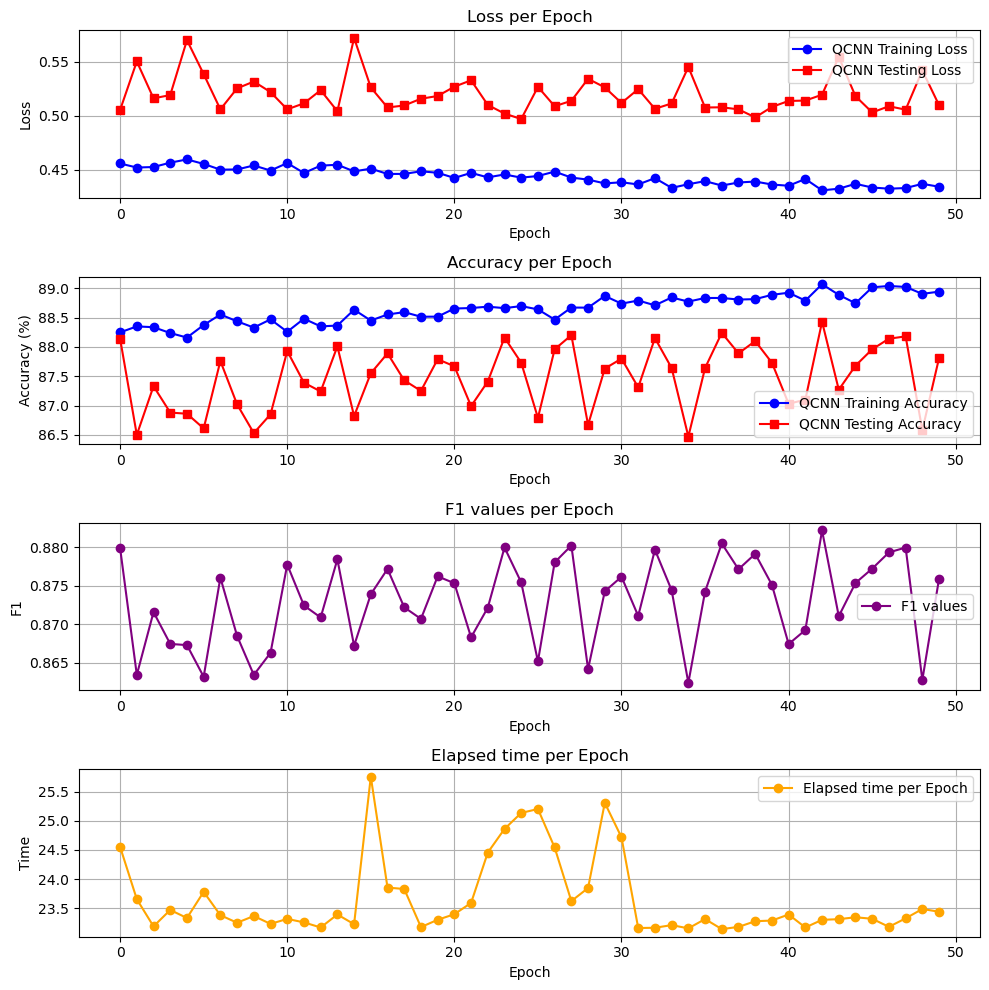

In [62]:

import matplotlib.pyplot as plt
# Plot training loss
plt.figure(figsize=(10, 10))

plt.subplot(4, 1,1)
plt.plot(loss_list, marker='o', label='QCNN Training Loss', color='blue')
plt.plot(val_loss_list,marker='s', label='QCNN Testing Loss', color='red')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

# Plot test accuracy
plt.subplot(4, 1, 2)
plt.plot(accuracy_list, marker= 'o', label='QCNN Training Accuracy', color= 'blue')
plt.plot(val_accuracy_list,marker= 's', label= 'QCNN Testing Accuracy', color= 'red')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(test_f1_history, marker= 'o', label='F1 values', color= 'purple')
#plt.plot(test_acc_history,marker= 's', label= 'QCNN Testing Accuracy', color= 'red')
plt.title('F1 values per Epoch')
plt.xlabel('Epoch')
plt.ylabel('F1')
plt.grid(True)
plt.legend()


plt.subplot(4, 1, 4)
plt.plot(qcnn_epoch_time, marker= 'o', label='Elapsed time per Epoch', color= 'orange')
#plt.plot(test_acc_history,marker= 's', label= 'QCNN Testing Accuracy', color= 'red')
plt.title('Elapsed time per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Time')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.savefig('mnist_qcnn_F1_epochTime.png')
plt.show()

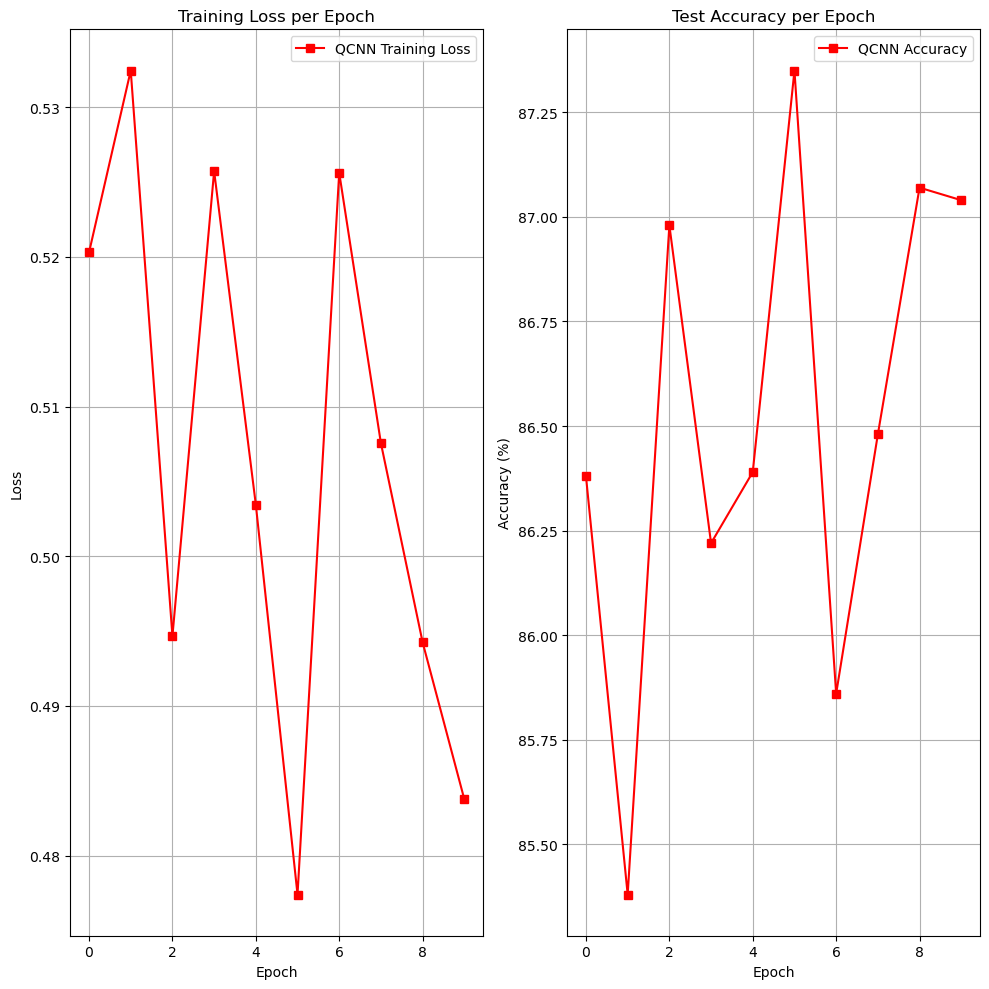

In [33]:

    # Plot training loss
    plt.figure(figsize=(10, 10))
    
    plt.subplot(1, 2, 1)
    #plt.plot(train_losses, marker='o', label='QCNN Training Loss', color='blue')
    plt.plot(val_loss_list,marker='s', label='QCNN Training Loss', color='red')
    plt.title('Training Loss per Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.legend()
    
    # Plot test accuracy
    plt.subplot(1, 2, 2)
    #plt.plot(test_accuracies, marker= 'o', label='QCNN Accuracy', color= 'blue')
    plt.plot(val_accuracy_list,marker= 's', label= 'QCNN Accuracy', color= 'red')
    plt.title('Test Accuracy per Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.grid(True)
    plt.legend()
    
    plt.tight_layout()
    #plt.savefig('mnist_qcnn_Y.png')
    plt.show()

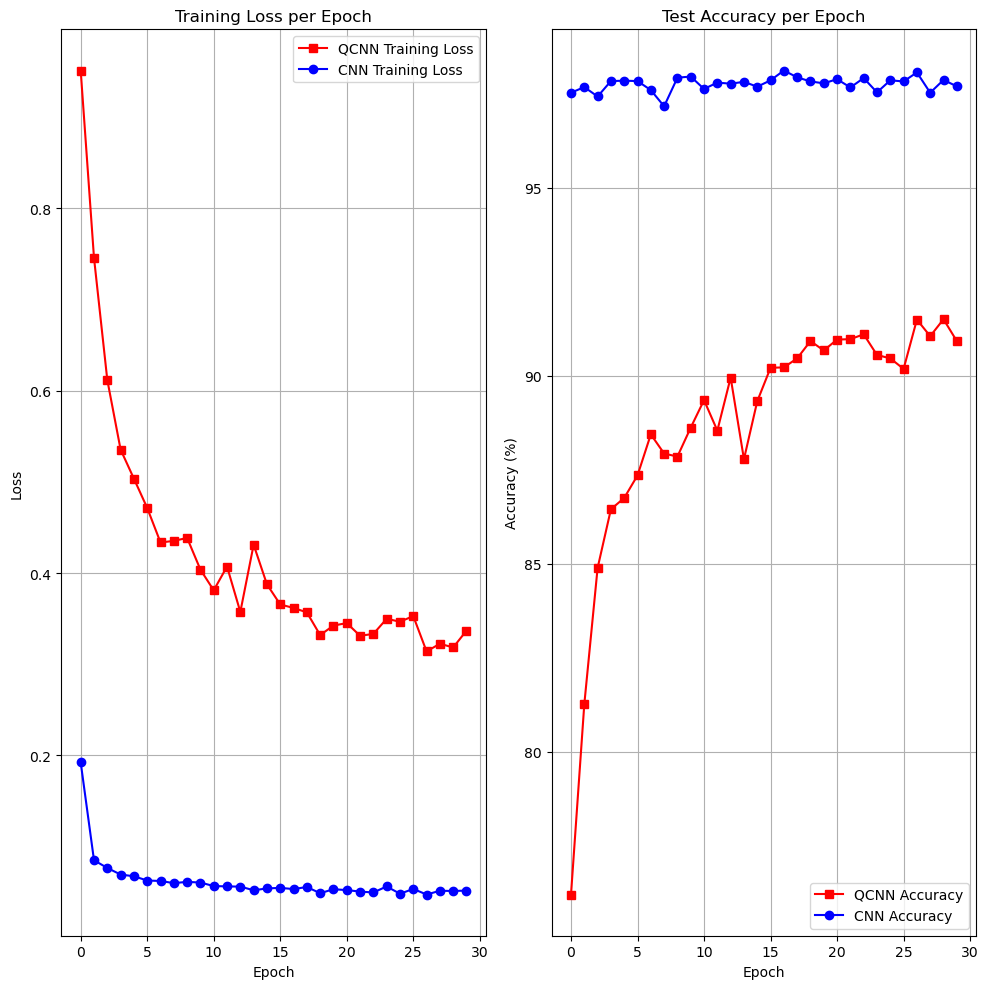

In [55]:
# Plot training loss
plt.figure(figsize=(10, 10))
    
plt.subplot(1, 2, 1)
#plt.plot(train_losses, marker='o', label='QCNN Training Loss', color='blue')
plt.plot(val_loss_list,marker='s', label='QCNN Training Loss', color='red')
plt.plot(cnn_loss_values,marker='o', label='CNN Training Loss', color='blue')
plt.title('Training Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
    
# Plot test accuracy
plt.subplot(1, 2, 2)
#plt.plot(test_accuracies, marker= 'o', label='QCNN Accuracy', color= 'blue')
plt.plot(val_accuracy_list,marker= 's', label= 'QCNN Accuracy', color= 'red')
plt.plot(cnn_accuracy,marker= 'o', label= 'CNN Accuracy', color= 'blue')
plt.title('Test Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.savefig('mnist_cnnvsqcnn_Hadamard_10Qubits.png')
plt.show()